# IMPORTING LIBRARIES

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams

%matplotlib inline

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 

print("Setup Complete")

Setup Complete


# EXPLORATORY DATA ANALYSIS

## Reading .csv data into variable 'spotify'

In [2]:
spotify = pd.read_csv('data.csv')
spotify_by_genre = pd.read_csv('data_by_genres.csv')

spotify.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


## Listing 'spotify' information

In [3]:
print('Info:', spotify.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

## Checking for null values

In [4]:
spotify.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

## Statistical details and rounding

In [5]:
spotify.describe().round(decimals=2)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.00,169909.00,169909.00,169909.00,169909.00,169909.00,169909.00,169909.00,169909.00,169909.00,169909.00,169909.00,169909.00,169909.00,169909.00
mean,0.49,0.54,231406.16,0.49,0.08,0.16,5.20,0.21,-11.37,0.71,31.56,0.09,116.95,0.53,1977.22
std,0.38,0.18,121321.92,0.27,0.28,0.31,3.52,0.18,5.67,0.45,21.58,0.15,30.73,0.26,25.59
min,0.00,0.00,5108.00,0.00,0.00,0.00,0.00,0.00,-60.00,0.00,0.00,0.00,0.00,0.00,1921.00
25%,0.09,0.42,171040.00,0.26,0.00,0.00,2.00,0.10,-14.47,0.00,12.00,0.03,93.52,0.32,1957.00
50%,0.49,0.55,208600.00,0.48,0.00,0.00,5.00,0.14,-10.47,1.00,33.00,0.04,114.78,0.54,1978.00
75%,0.89,0.67,262960.00,0.71,0.00,0.09,8.00,0.26,-7.12,1.00,48.00,0.08,135.71,0.75,1999.00
max,1.00,0.99,5403500.00,1.00,1.00,1.00,11.00,1.00,3.86,1.00,100.00,0.97,244.09,1.00,2020.00


## Columns

In [6]:
spotify.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

## Display year-wise

In [7]:
year_avg = spotify[["acousticness","danceability","energy", "instrumentalness", 
               "liveness","tempo", "valence", "loudness", "speechiness", "year"]].\
groupby("year").mean().sort_values(by="year").reset_index()

year_avg

,year,acousticness,danceability,energy,instrumentalness,liveness,tempo,valence,loudness,speechiness
0,1921,0.895823,0.425661,0.236784,0.322330,0.215814,100.397758,0.425495,-17.095438,0.077258
1,1922,0.939236,0.480000,0.237026,0.440470,0.238647,101.376139,0.534056,-19.179958,0.115419
2,1923,0.976329,0.568462,0.246936,0.401932,0.236656,112.456598,0.624788,-14.373882,0.098619
3,1924,0.935575,0.548654,0.347033,0.583955,0.237875,120.653359,0.668574,-14.202304,0.090210
4,1925,0.965422,0.571890,0.264373,0.408893,0.243094,115.671715,0.616430,-14.516707,0.115457
...,...,...,...,...,...,...,...,...,...,...
95,2016,0.280290,0.599976,0.592877,0.074646,0.180198,119.070344,0.430769,-7.949913,0.107298
96,2017,0.289916,0.612286,0.586739,0.098209,0.194218,116.840278,0.414465,-8.422697,0.111752
97,2018,0.271941,0.664930,0.590591,0.035948,0.171781,122.004325,0.447141,-7.253666,0.128140
98,2019,0.289298,0.644215,0.578796,0.076518,0.167161,118.868163,0.465856,-8.041738,0.124799


## Longest song

In [8]:
spotify["duration_ms"].describe()

count    1.699090e+05
mean     2.314062e+05
std      1.213219e+05
min      5.108000e+03
25%      1.710400e+05
50%      2.086000e+05
75%      2.629600e+05
max      5.403500e+06
Name: duration_ms, dtype: float64

In [9]:
spotify["duration_minutes"] = spotify["duration_ms"] / 60000
spotify[spotify["duration_ms"] == spotify["duration_ms"].max()]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_minutes
7411,0.111,['Sound Dreamer'],0.0,5403500,0.000099,0,7foc25ig7dibxvULPU2kBG,0.392,2,0.137,-21.669,1,Brown Noise - 90 Minutes,50,2013-06-05,0.0,0.0,0.0,2013,90.058333


## Popularity

In [10]:
spotify["popularity"].describe()

count    169909.000000
mean         31.556610
std          21.582614
min           0.000000
25%          12.000000
50%          33.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64

In [11]:
spotify[spotify["popularity"] > 90]["name"]

87440                                            Play Date
87540                                           goosebumps
87741                                              Falling
87742                                           SICKO MODE
87840                                              The Box
87842                                          Sunday Best
87843                                              ROXANNE
87844                                           Supalonely
87845                                               Say So
87847                                  HIGHEST IN THE ROOM
87850                                      Don't Start Now
87852                 ily (i love you baby) (feat. Emilee)
87856                                    Someone You Loved
87858                                         Dance Monkey
87863                                              bad guy
87865                                             Memories
87890                                          Breaking 

# VISUALIZATIONS

## Line Plot - Count of tracks added

Text(0.5, 0, 'Year')

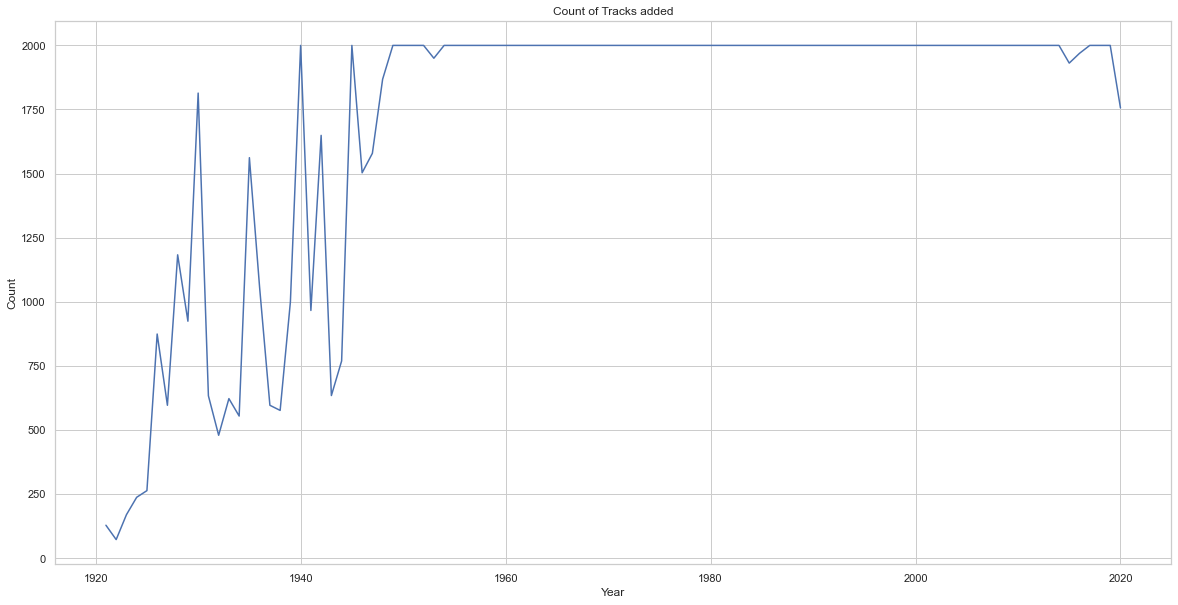

In [12]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
x = spotify.groupby("year")["id"].count()
ax= sns.lineplot(x.index,x)
ax.set_title('Count of Tracks added')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

## Line Plot - Loudness

Text(0.5, 0, 'Year')

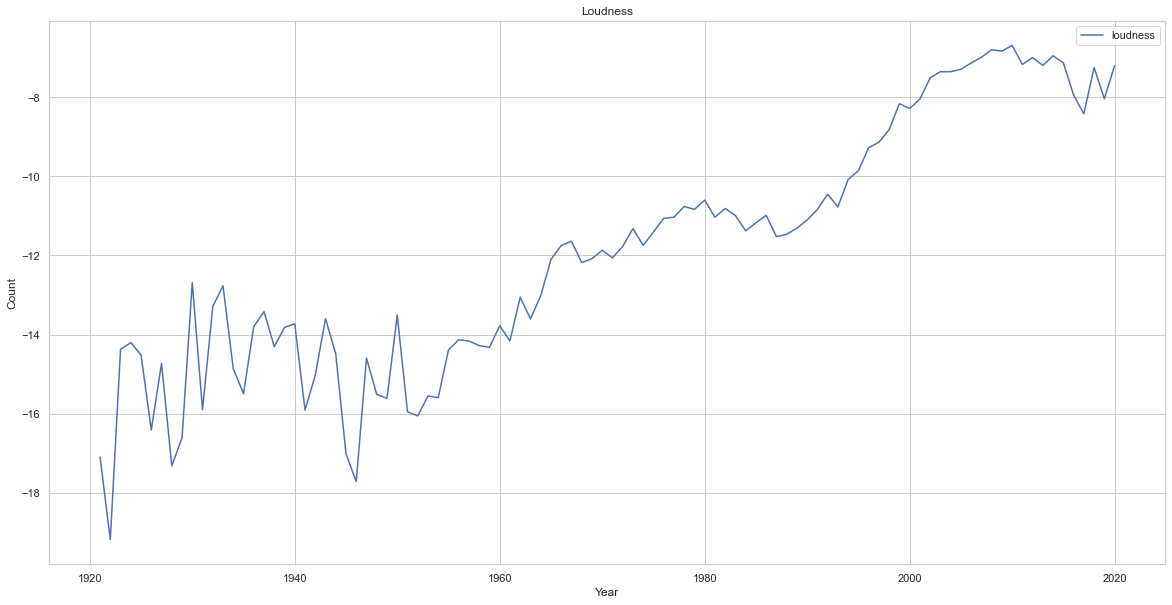

In [13]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
columns = ["loudness"]
for col in columns:
    x = spotify.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Loudness')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

## Line Plot - Tempo

Text(0.5, 0, 'Year')

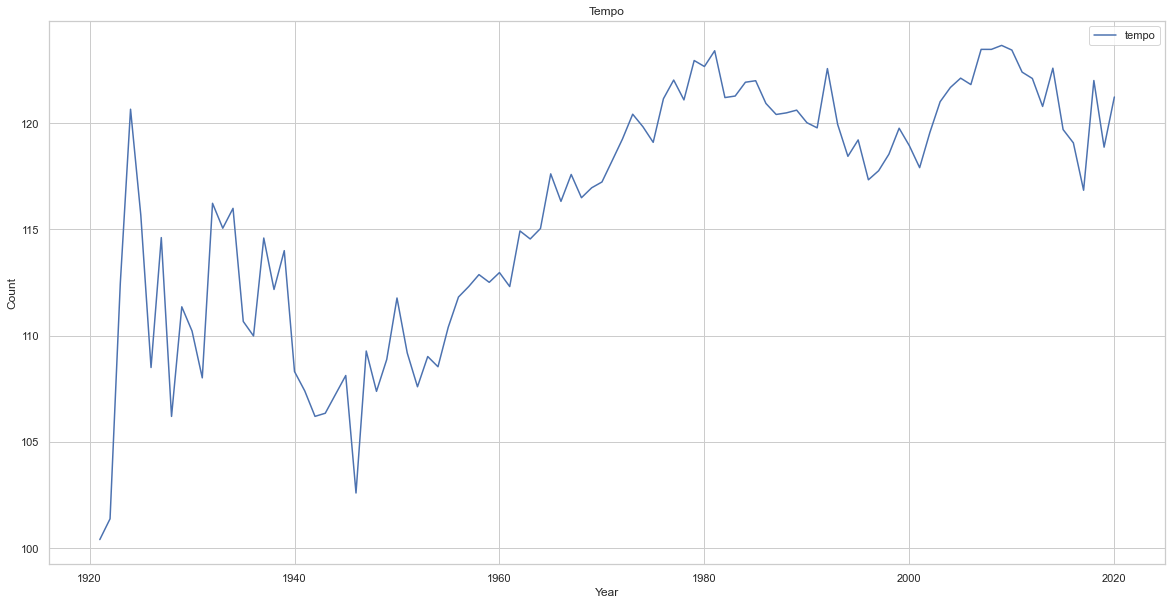

In [14]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
columns = ["tempo"]
for col in columns:
    x = spotify.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Tempo')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

## Line Plot - Increase of artists over the year

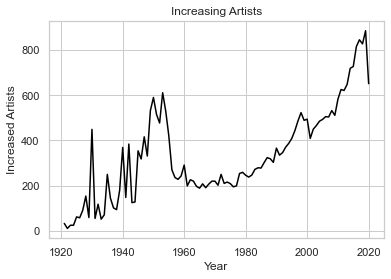

In [15]:
artists_data = {}

added = []
for year in spotify['year'].unique():
   
    total_artist = []
    for artist in spotify[spotify.year == year]['artists'].unique():
        if artist not in added:
            total_artist.append(artist)
    artists_data[year] = len(total_artist)
    added.extend(total_artist)
 
artists_record = pd.DataFrame({'Year': list(artists_data.keys()),
                              'Increased_artists': list(artists_data.values())})

sns.lineplot('Year', 'Increased_artists', color='black', data=artists_record)
plt.title('Increasing Artists')
plt.xlabel('Year')
plt.ylabel('Increased Artists')
plt.show()

## Line Plot - Increase of listeners over the year

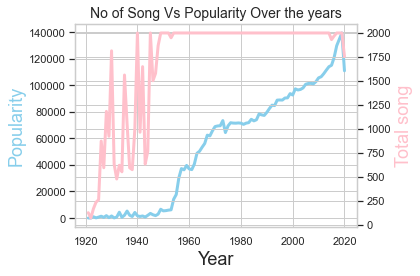

In [16]:
year_grp = spotify.groupby(['year'], as_index=False)
popularity_track = year_grp[['name', 'popularity']].sum()
song_count = year_grp['name'].count()


fig, ax1 = plt.subplots()

ax1.plot(popularity_track.year, popularity_track.popularity, color='skyblue', linewidth=3,)
ax1.set_title('No of Song Vs Popularity Over the years', fontsize=14)
ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('Popularity', color='skyblue', fontsize=18)

ax2 = ax1.twinx()
 
ax2.plot(song_count.year, song_count.name, color='black', linewidth=3)
ax2.set_ylabel('Total song', color='black', fontsize=18)
fig.tight_layout()
plt.show()

## Line Plot - Audio characteristics over the year

Text(0.5, 0, 'Year')

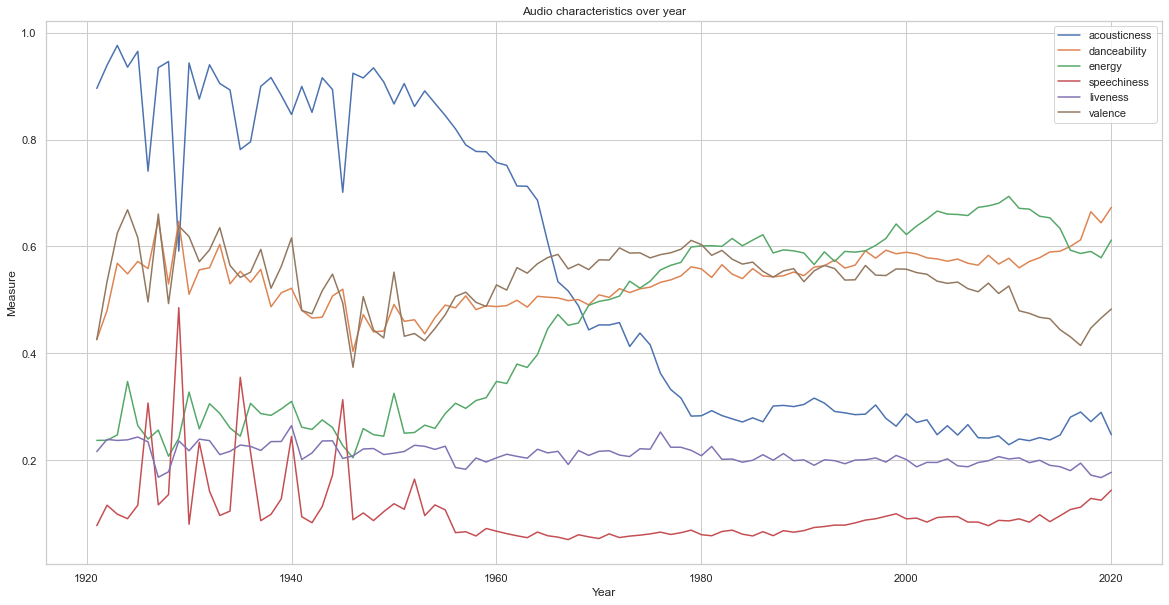

In [17]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = spotify.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

## Line Plot - Song trends over the year

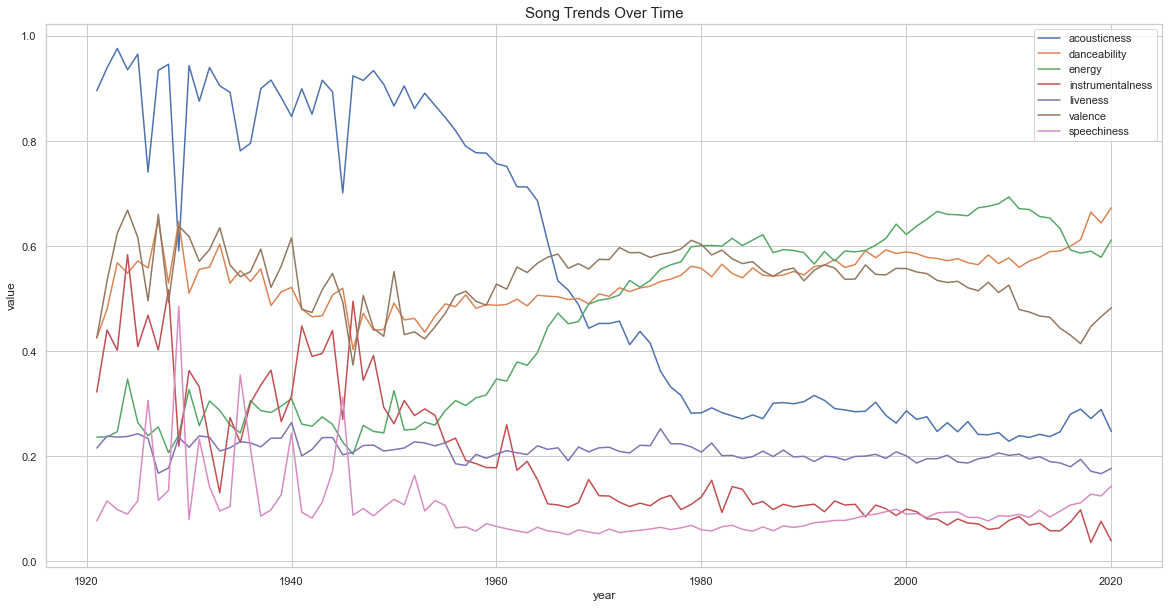

In [18]:
year_avg = spotify[["acousticness","danceability","energy", "instrumentalness", 
               "liveness","tempo", "valence", "loudness", "speechiness", "year"]].\
groupby("year").mean().sort_values(by="year").reset_index()

year_avg.head()

plt.figure(figsize=(20,10))
plt.title("Song Trends Over Time", fontdict={"fontsize": 15})

lines = ["acousticness","danceability","energy", 
         "instrumentalness", "liveness", "valence", "speechiness"]

for line in lines:
    ax = sns.lineplot(x='year', y=line, data=year_avg)
    
plt.ylabel("value")
plt.legend(lines)


## Dist Plot - Popularity

Text(0.5, 1.0, 'Dist Plot')

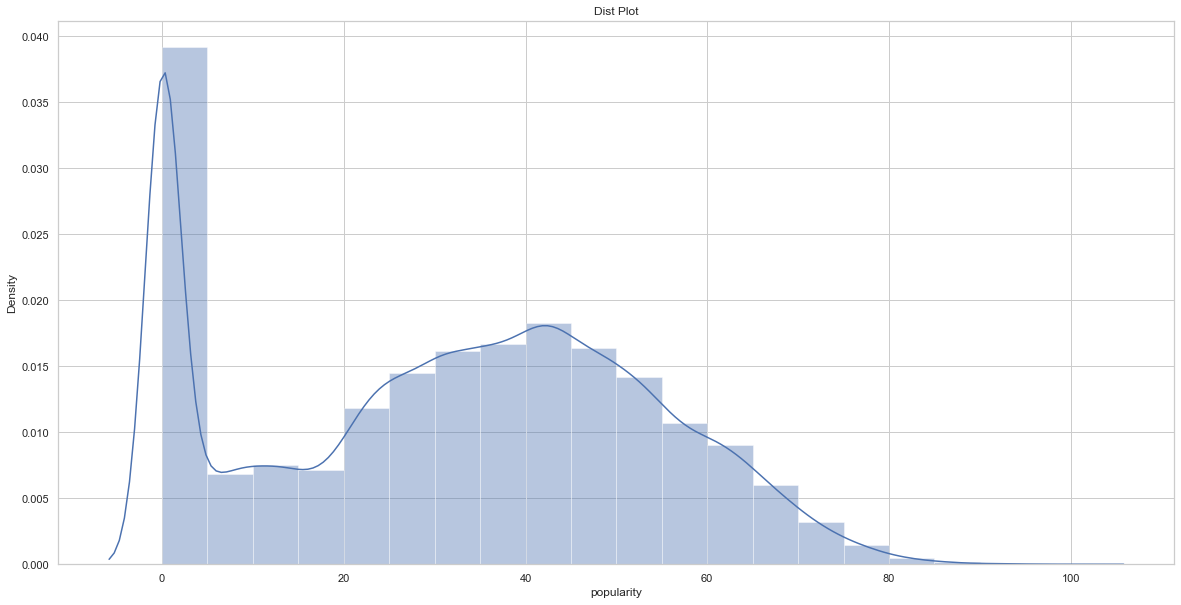

In [19]:
plt.figure(figsize=(20, 10))
sns.distplot(spotify.popularity,bins=20)
plt.title('Dist Plot')

## Joint Plot - Popularity vs Duration_ms

<Figure size 1440x720 with 0 Axes>

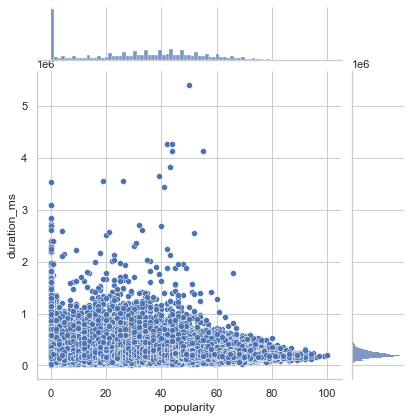

In [20]:
plt.figure(figsize=(20, 10))
ax = sns.jointplot(x=spotify.popularity,y=spotify["duration_ms"],data=spotify)

## Bar Plot - Top 10 artists

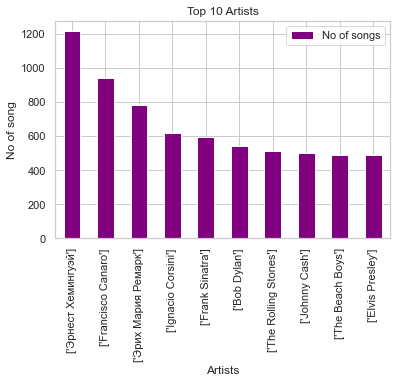

In [21]:
Top10 = pd.DataFrame({'No of songs':spotify['artists'].value_counts().head(10)})
Top10.plot.bar(color='purple')
plt.title('Top 10 Artists')
plt.xlabel('Artists')
plt.ylabel('No of song')
plt.show()

## Bar Plot - Top 10 popular tracks

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'death bed (coffee for your head) (feat. beabadoobee)'),
  Text(1, 0, 'Supalonely'),
  Text(2, 0, 'ily (i love you baby) (feat. Emilee)'),
  Text(3, 0, 'Stuck with U (with Justin Bieber)'),
  Text(4, 0, 'GOOBA'),
  Text(5, 0, 'Tusa'),
  Text(6, 0, 'SICKO MODE'),
  Text(7, 0, 'Yo Perreo Sola'),
  Text(8, 0, 'Breaking Me'),
  Text(9, 0, 'Safaera')])

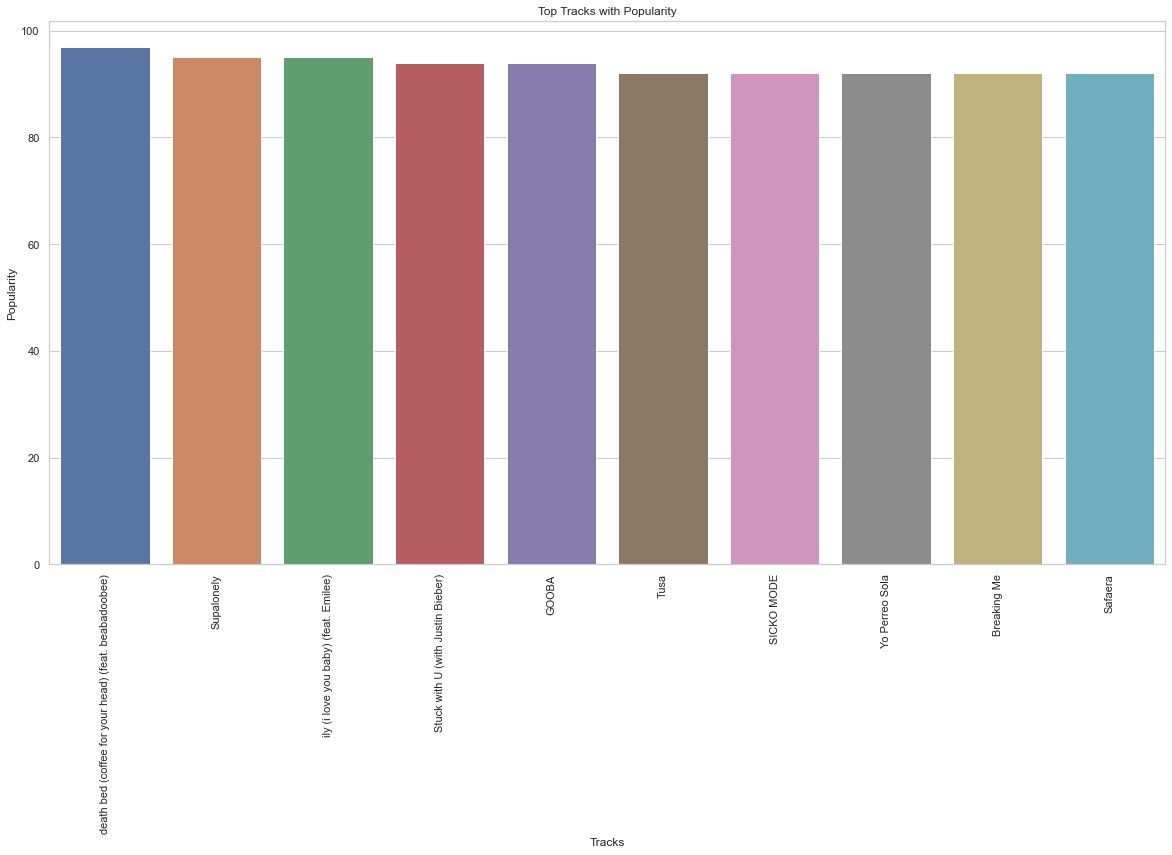

In [22]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
x = spotify.groupby("name")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top Tracks with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Tracks')
plt.xticks(rotation = 90)

## Bar Plot - Top artists with popularity by mean

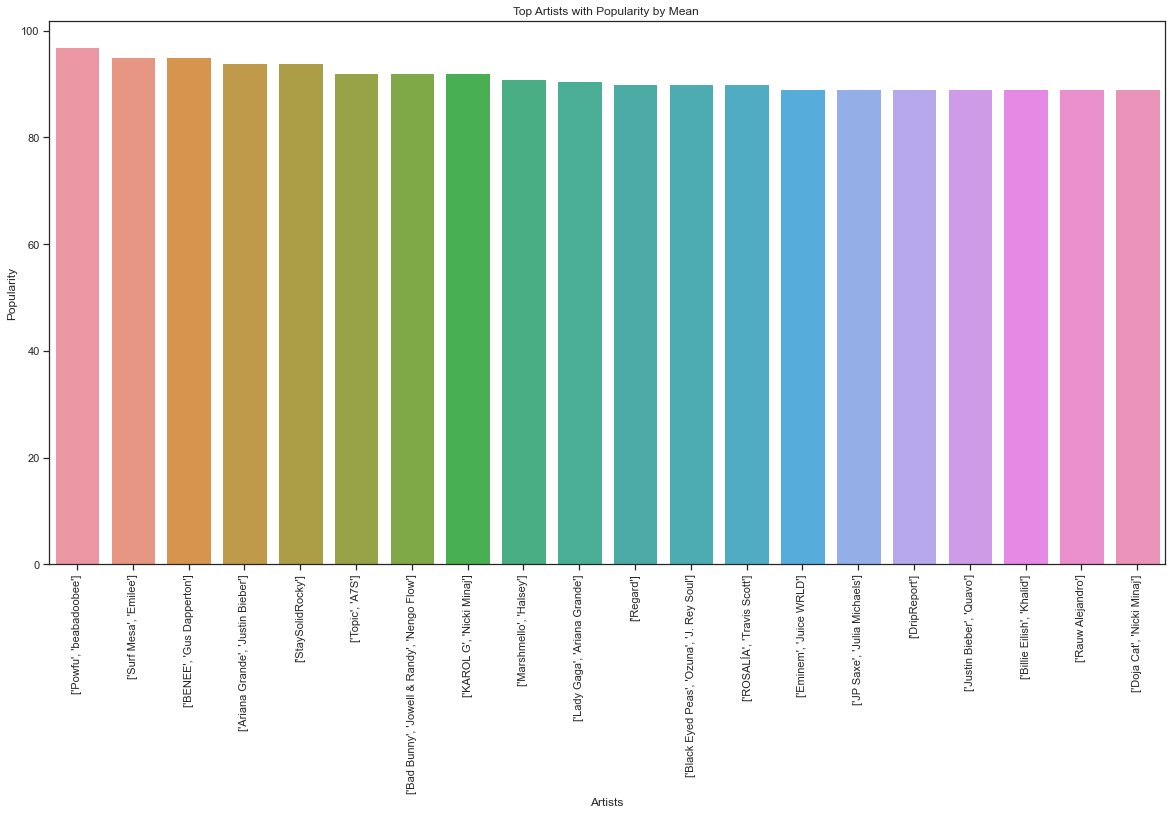

In [23]:
plt.figure(figsize=(20, 10))
sns.set(style="ticks")
x = spotify.groupby("artists")["popularity"].mean().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity by Mean ')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)
columns = ['acousticness','danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'popularity', 'speechiness', 'tempo', 'valence']

## Bar plot - Top artists with popularity by sum

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, "['The Beatles']"),
  Text(1, 0, "['The Rolling Stones']"),
  Text(2, 0, "['Bob Dylan']"),
  Text(3, 0, "['Elvis Presley']"),
  Text(4, 0, "['Frank Sinatra']"),
  Text(5, 0, "['Led Zeppelin']"),
  Text(6, 0, "['Fleetwood Mac']"),
  Text(7, 0, "['Queen']"),
  Text(8, 0, "['The Beach Boys']"),
  Text(9, 0, "['Johnny Cash']"),
  Text(10, 0, "['Bob Marley & The Wailers']"),
  Text(11, 0, "['Taylor Swift']"),
  Text(12, 0, "['Red Hot Chili Peppers']"),
  Text(13, 0, "['Elton John']"),
  Text(14, 0, "['Eminem']"),
  Text(15, 0, "['Metallica']"),
  Text(16, 0, "['Pink Floyd']"),
  Text(17, 0, "['Miles Davis']"),
  Text(18, 0, "['Vicente Fernández']"),
  Text(19, 0, "['Stevie Wonder']")])

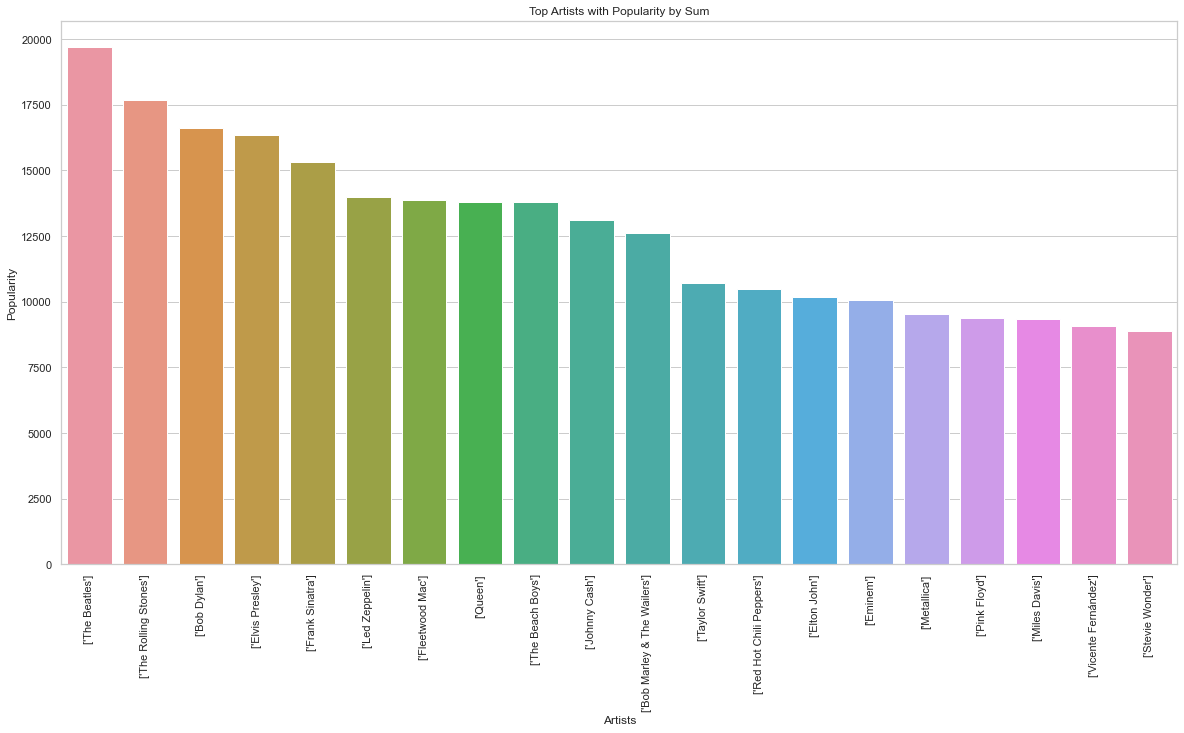

In [24]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
x = spotify.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity by Sum')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

## Pair Plot - Popularity of genres

<Figure size 1440x720 with 0 Axes>

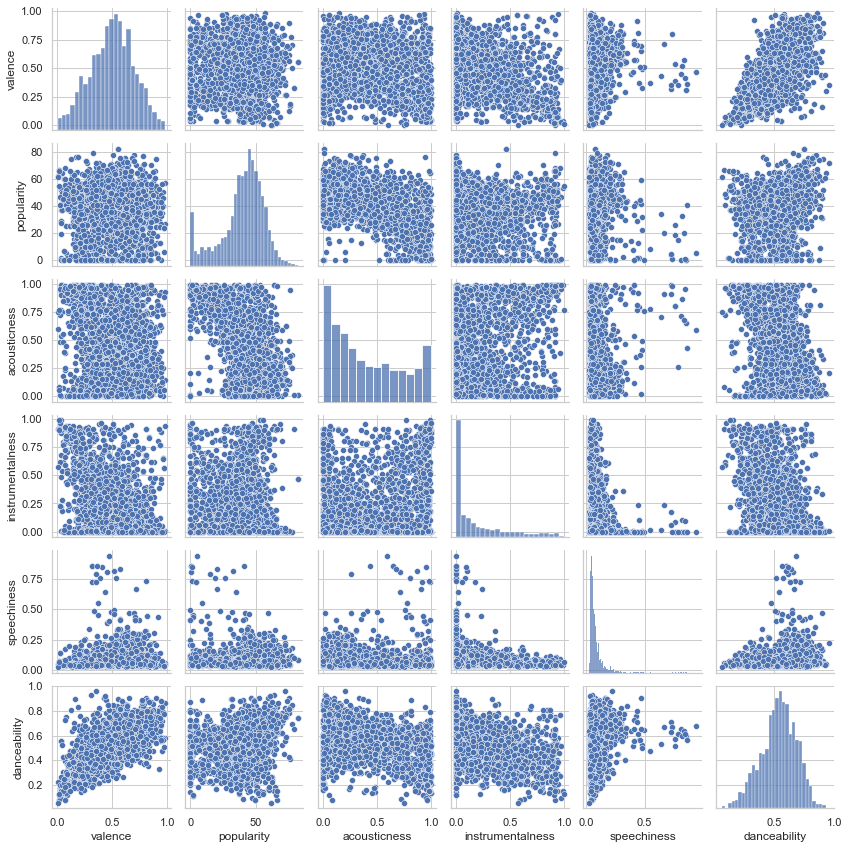

In [25]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
cols = ["valence","popularity","acousticness","instrumentalness","speechiness","danceability" ]
sns.pairplot(spotify_by_genre[cols], height = 2 )
plt.show();

## Heatmap

Text(0.5, 1.0, 'Correlation')

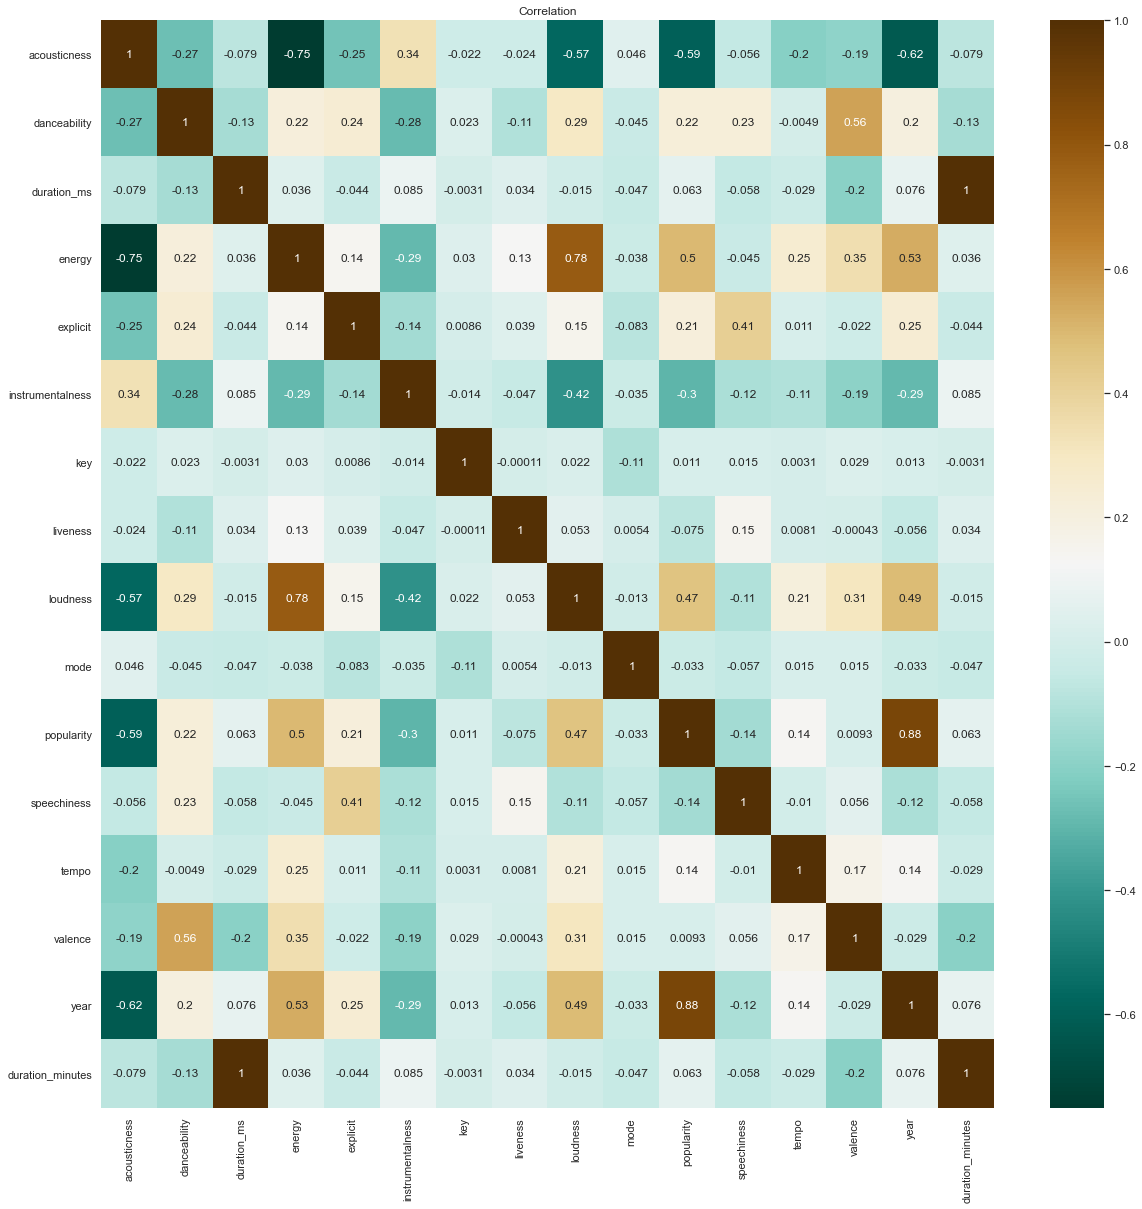

In [26]:
plt.figure(figsize = (20,20))
sns.heatmap(spotify.corr(), annot=True, cmap='BrBG_r')
plt.title('Correlation')

## Clustermap

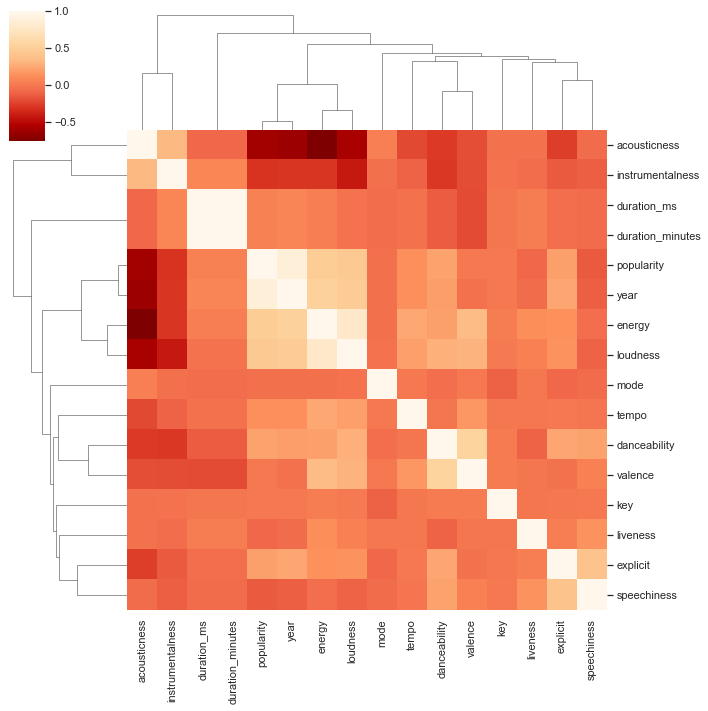

In [27]:
sns.clustermap(spotify.corr(),cmap="OrRd_r")

## Overall Data Distribution

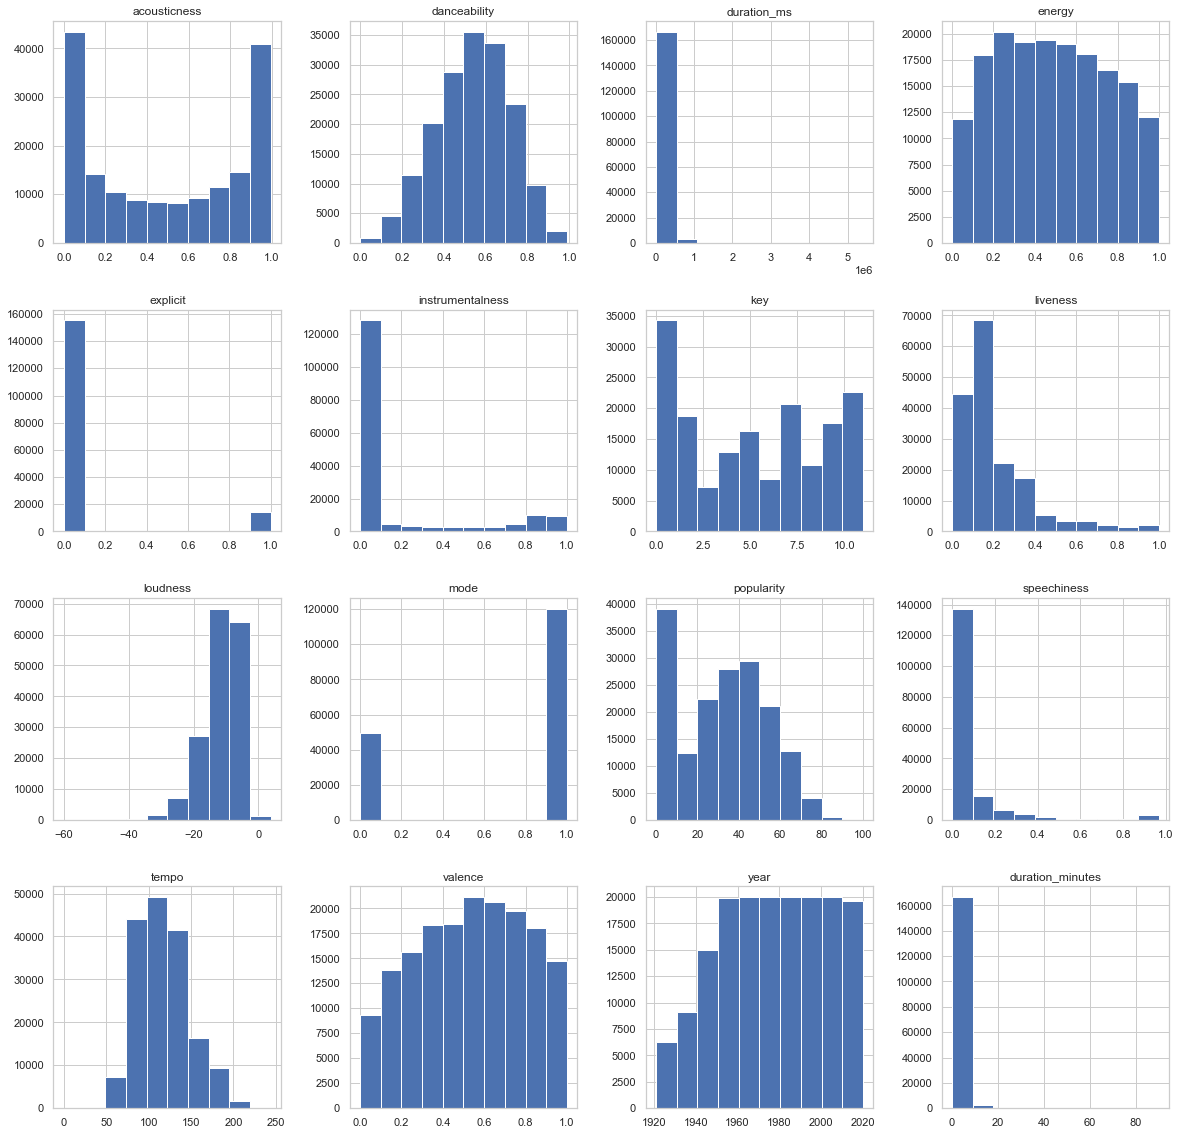

In [28]:
spotify.hist(figsize = (20,20))
plt.show()

# FORECAST PROGRAM FOR POPULARITY

### Random Forest Regression Model

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

mean_pop = spotify.groupby(['artists'])['popularity'].mean()
mean_dict = mean_pop.to_dict()
def converter(artist):
    if artist in mean_dict.keys():
        return mean_dict[artist]
    else:
        return 0
spotify['artist_mean_pop'] = spotify['artists'].apply(converter)


In [30]:
features = ['acousticness','danceability', 'duration_ms', 'energy', 'explicit',
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
            'speechiness', 'tempo', 'valence']
x = spotify[features].values
y = spotify['popularity'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

#### Training model

In [31]:
rfr = RandomForestRegressor()

In [32]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [33]:
rfr_pred = rfr.predict(x_test)

#### Mean absolute error

In [34]:
metrics.mean_absolute_error(y_test,rfr_pred)

10.135334674309426

#### Mean squared error

In [35]:
np.sqrt(metrics.mean_squared_error(y_test,rfr_pred))

13.352498511911815

#### Model accuracy

In [36]:
RF=metrics.r2_score(y_test,rfr_pred)*100
RF

61.78828133710497

#### Sample prediction  for tail dataset

In [37]:
print(rfr.predict(spotify[features].tail()))
print('==============================================')
print(spotify['popularity'].tail())


[72.65333333 53.32       58.38       61.76       49.47      ]
169904    75
169905    64
169906    70
169907    70
169908    65
Name: popularity, dtype: int64
